## import essential libriries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

## Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


## pre processing

In [3]:
# drop the tweetsid as they wont be used in the analytical process
df = df.drop(['tweetid'], axis=1)

In [4]:
# check a quick summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 2 columns):
sentiment    15819 non-null int64
message      15819 non-null object
dtypes: int64(1), object(1)
memory usage: 247.3+ KB


+ Seems like we have have no missing values in the data. so we will check using 
isnull().sum() to verify that the're no missing values.

In [5]:
df.isnull().sum()

sentiment    0
message      0
dtype: int64

## EDA 

In [6]:
df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

+ It seems like we have 4 sentiments ranging from -1 to 2

In [7]:
#new = df[df['sentiment']==2]
#pro = df[df['sentiment']==1]
#neutral = df[df['sentiment']==0]
#anti = df[df['sentiment']==-1]

<AxesSubplot:xlabel='sentiment', ylabel='count'>

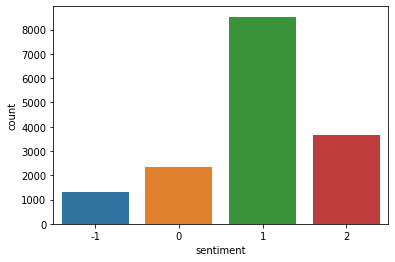

In [8]:
# the distribution of the target variables
sns.countplot(df['sentiment'], label = "Count")

+ from the plot we can see that most of the tweets supports the man-made climate change.
followed by tweets tha that do not believe in a man-made climate change. The difference 
in the number of tweets for other sentiments is not that big as compared to others. So,
our model might predict tweets that support man-made climate chage better than other tweets.
We might need to Up sample, Down sample or use SMOTE at a later stage

## Data Cleaning

In [9]:
df['message'][10]

"RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦"

In [10]:
# remove web address, @mentions, #hashtags, RT, and also remove additional white spaces

In [11]:
# remove mentions
mentions = r'@[A-Za-z0-9]+'

df['message'] = df['message'].replace(mentions,'', regex = True)

In [12]:
# remove web address
url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'

df['message'] = df['message'].replace(url,'url', regex = True)

In [13]:
# remove hashtags
hashtags = r'#[A-Za-z0-9]+'

df['message'] = df['message'].replace(hashtags,'', regex = True)

In [14]:
# keep only letters
letters = r"[^a-zA-Z.!?']"

df['message'] = df['message'].replace(letters,' ', regex = True)

In [15]:
# keep only letters (pantuation)
#letters = r'[^a-zA-Z.!?']'
#df['message'] = df['message'].replace(letters,'', regex = True)

In [16]:
df.head()

,sentiment,message
0,1,PolySciMajor EPA chief doesn't think carbon di...
1,1,It's not like we lack evidence of anthropogeni...
2,2,RT Researchers say we have three years to ac...
3,1,WIRED was a pivotal year in the war o...
4,1,RT It's and a racist sexist climate ...


## remove pantuations

In [17]:
df['message'] = df['message'].str.lower()

In [18]:
import string

In [19]:
def remove_punctuation(message):
    return ''.join([tweet for tweet in message if tweet not in string.punctuation])

In [20]:
df['message'] = df['message'].apply(remove_punctuation)

In [21]:
df['message'][10]

'rt   shes thinking about how shes going to die because your husband doesnt believe in climate change url       '

In [22]:
# place additional spaces with a single space
space = r' +'

df['message'] = df['message'].replace(space,' ', regex = True)

In [23]:
df

,sentiment,message
0,1,polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...
2,2,rt researchers say we have three years to act ...
3,1,wired was a pivotal year in the war on climat...
4,1,rt its and a racist sexist climate change deny...
...,...,...
15814,1,rt they took down the material on global warmi...
15815,2,rt how climate change could be breaking up a m...
15816,0,notiven rt nytimesworld what does trump actual...
15817,-1,rt hey liberals the climate change crap is a h...


## Tokenizer

In [24]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

tokeniser = TreebankWordTokenizer()

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#df['tokenized'] = df.apply(lambda row: word_tokenize(row['message']), axis=1)
df['tokenized'] = df['message'].apply(tokeniser.tokenize)

In [27]:
df.head()

,sentiment,message,tokenized
0,1,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr..."
2,2,rt researchers say we have three years to act ...,"[rt, researchers, say, we, have, three, years,..."
3,1,wired was a pivotal year in the war on climat...,"[wired, was, a, pivotal, year, in, the, war, o..."
4,1,rt its and a racist sexist climate change deny...,"[rt, its, and, a, racist, sexist, climate, cha..."


## Lemmatization

In [28]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [29]:
def most_common_word(message, lemmatizer):
    return [lemmatizer.lemmatize(tweet) for tweet in message]

In [30]:
df['lemma'] = df['tokenized'].apply(most_common_word, args=(lemmatizer, ))
#lemmatise_token = token.apply(most_common_word, args=(lemmatizer, ))

In [31]:
df.head()

,sentiment,message,tokenized,lemma
0,1,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evidence, of, anthro..."
2,2,rt researchers say we have three years to act ...,"[rt, researchers, say, we, have, three, years,...","[rt, researcher, say, we, have, three, year, t..."
3,1,wired was a pivotal year in the war on climat...,"[wired, was, a, pivotal, year, in, the, war, o...","[wired, wa, a, pivotal, year, in, the, war, on..."
4,1,rt its and a racist sexist climate change deny...,"[rt, its, and, a, racist, sexist, climate, cha...","[rt, it, and, a, racist, sexist, climate, chan..."


## Count Vector

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(stop_words='english', max_features=90000)#max_features=50, min_df=2) #CountVectorizer(stop_words='english')

In [33]:
#X = df['lemma']
# I am now gonna the lemma column to a column of string and not a list of strings, since i get an error
def sentences(lemma):
    return ' '.join(lemma)

df['lemma'] = df['lemma'].apply(sentences)
df.head()
#X = df['message']

,sentiment,message,tokenized,lemma
0,1,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...",it not like we lack evidence of anthropogenic ...
2,2,rt researchers say we have three years to act ...,"[rt, researchers, say, we, have, three, years,...",rt researcher say we have three year to act on...
3,1,wired was a pivotal year in the war on climat...,"[wired, was, a, pivotal, year, in, the, war, o...",wired wa a pivotal year in the war on climate ...
4,1,rt its and a racist sexist climate change deny...,"[rt, its, and, a, racist, sexist, climate, cha...",rt it and a racist sexist climate change denyi...


In [34]:
X = df['lemma']

X = cv.fit_transform(X)

In [35]:
X.shape

(15819, 13086)

In [36]:
y = df['sentiment'].values

In [37]:
y.shape

(15819,)

## Sampling 

In [38]:
import scipy.sparse

In [39]:
## Turn the space matrix into a dataframe
df2 = pd.DataFrame.sparse.from_spmatrix(X)

In [40]:
df2['sentiment'] = df['sentiment']
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,13077,13078,13079,13080,13081,13082,13083,13084,13085,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [41]:
#df2 = scipy.sparse.csc_matrix(df2)
#df2.head()

df2.info()

In [42]:
new = df2[df2['sentiment']==2]
pro = df2[df2['sentiment']==1]
neutral = df2[df2['sentiment']==0]
anti = df2[df2['sentiment']==-1]

In [43]:
from sklearn.utils import resample

In [44]:
sample_size = int(len(new)*1.5)

df_new = resample(new,
                 replace= True,
                 n_samples= sample_size,
                 random_state=42)
df_pro = resample(pro,
                 replace= False, # down sample
                 n_samples= sample_size,
                 random_state=42)
df_neutral = resample(neutral,
                 replace= True,
                 n_samples= sample_size,
                 random_state=42)
df_anti = resample(anti,
                 replace= True,
                 n_samples= sample_size,
                 random_state=42)

#df_sampled = pd.concat([new, pro, df_neutral, df_anti])
df_sampled = pd.concat([df_new, df_pro, df_neutral, df_anti])

In [45]:
df_sampled

,0,1,2,3,4,5,6,7,8,9,...,13077,13078,13079,13080,13081,13082,13083,13084,13085,sentiment
13776,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2
15247,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2
3533,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2
5570,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2
4824,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14141,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-1
5087,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-1
14722,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-1
4442,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-1


## mini data preprocessing

In [46]:
df_sampled = df_sampled.fillna(0.0)

In [47]:
df_sampled

,0,1,2,3,4,5,6,7,8,9,...,13077,13078,13079,13080,13081,13082,13083,13084,13085,sentiment
13776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
15247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
5087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
14722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


## Train test split

In [48]:
X = df_sampled.iloc[:,:-1].values
X.shape

(21840, 13086)

In [49]:
y = df_sampled.iloc[:,-1].values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Training the model 

In [52]:
X_train.shape

(17472, 13086)

In [53]:
#X_train_ann = X_train.todense()

In [54]:
#X_train_ann.shape

In [55]:
#import tensorflow.keras
#from keras.models import Sequential 
#from keras.layers import Dense #connects all the layers

#model = Sequential()
# try 40,30,30 and then work from there
#model.add(Dense(100, input_dim = X_train_ann.shape[-1], activation = 'relu'))
#model.add(Dense(70, activation='relu'))
#model.add(Dense(70, activation='relu'))
#model.add(Dense(1, activation = 'softmax'))

In [56]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
#epochs_hist = model.fit(X_train_ann, y_train, epochs = 50, batch_size = 30, validation_split = 0.2)

In [58]:
#print(epochs_hist.history.keys())

In [59]:
#plt.plot(epochs_hist.history['loss'])
#plt.plot(epochs_hist.history['val_loss'])

#plt.title('Model Loss Progression During Training/Validation')
#plt.ylabel('Training and Validation Losses')
#plt.xlabel('Epoch Number')
#plt.legend(['Training Loss', 'Validation Loss'])

## SVM

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
#from sklearn.svm import SVC
#svc = SVC(kernel='linear', random_state=0)
#svc.fit(X_train, y_train)

In [62]:
#y_pred = svc.predict(X_test)

In [63]:
#print(confusion_matrix(y_test,y_pred))
#print('\n')
#print(classification_report(y_test,y_pred))

## kernel SVM 

In [64]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', gamma=1, C=10)
svc_rbf.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [65]:
y_pred = svc_rbf.predict(X_test)

In [66]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[1070    5    8    0]
 [   5  994   69   11]
 [  21   75  941   84]
 [   3   10   78  994]]


              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      1083
           0       0.92      0.92      0.92      1079
           1       0.86      0.84      0.85      1121
           2       0.91      0.92      0.91      1085

    accuracy                           0.92      4368
   macro avg       0.92      0.92      0.92      4368
weighted avg       0.91      0.92      0.92      4368



## Save the model 

In [81]:
import pickle

In [84]:
Pkl_Filename = "Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(svc_rbf, file)

## Test set

In [86]:
df = pd.read_csv('test.csv')
df

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455


In [87]:
df.isnull().sum()

message    0
tweetid    0
dtype: int64

In [88]:
df['message'] = df['message'].replace(mentions,'', regex = True)

df['message'] = df['message'].replace(url,'url', regex = True)

df['message'] = df['message'].replace(hashtags,'', regex = True)

df['message'] = df['message'].replace(letters,' ', regex = True)

df['message'] = df['message'].str.lower()

In [89]:
df['message'] = df['message'].apply(remove_punctuation)

df['message'] = df['message'].replace(space,' ', regex = True)

In [90]:
df['tokenized'] = df['message'].apply(tokeniser.tokenize)

In [91]:
df['lemma'] = df['tokenized'].apply(most_common_word, args=(lemmatizer, ))

In [92]:
df['lemma'] = df['lemma'].apply(sentences)

In [93]:
df['message'][3]

' putin got to you too jill trump doesnt believe in climate change at all thinks its s hoax'

In [94]:
#cv = TfidfVectorizer(stop_words='english', min_df=2) #CountVectorizer(stop_words='english')
X_t = df['lemma']

X_t = cv.transform(X_t)

In [95]:
X_t = pd.DataFrame.sparse.from_spmatrix(X_t)

In [96]:
X_t.shape

(10546, 13086)

In [ ]:
# Save the clean data 
X_t.to_csv('df_clean.csv', index = False)

In [80]:
y_pred = svc_rbf.predict(X_t.values)

MemoryError: Unable to allocate 1.03 GiB for an array with shape (13086, 10546) and data type float64

In [ ]:
tweetid = df['tweetid']

d = {'sentiment':y_pred}
y_pred_t = pd.DataFrame(d)
y_pred_t

In [ ]:
df_submit = pd.concat([tweetid, y_pred_t], axis=1)
df_submit

In [ ]:
df_submit.to_csv('third_submission.csv', index = False)

In [ ]:
df_submit.nunique()

In [ ]:
# https://www.kaggle.com/jomoon/starter-notebook-edsa-classification